In [2]:
# pip install -U imgaug numpy

In [7]:
import imageio
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

ia.seed(1)

# Load an example image (uint8, 128x128x3).
image = ia.quokka(size=(128, 128), extract="square")

# Define an example segmentation map (int32, 128x128).
# Here, we arbitrarily place some squares on the image.
# Class 0 is our intended background class.
segmap = np.zeros((128, 128, 1), dtype=np.int32)
segmap[28:71, 35:85, 0] = 1
segmap[10:25, 30:45, 0] = 2
segmap[10:25, 70:85, 0] = 3
segmap[10:110, 5:10, 0] = 4
segmap[118:123, 10:110, 0] = 5
segmap = SegmentationMapsOnImage(segmap, shape=image.shape)

# Define our augmentation pipeline.
seq = iaa.Sequential([
    iaa.Affine(rotate=(-45, 45)),  # rotate by -45 to 45 degrees (affects segmaps)
], random_order=True)

# Augment images and segmaps.
images_aug = []
segmaps_aug = []
for _ in range(5):
    images_aug_i, segmaps_aug_i = seq(image=image, segmentation_maps=segmap)
    images_aug.append(images_aug_i)
    segmaps_aug.append(segmaps_aug_i)

# We want to generate an image containing the original input image and
# segmentation maps before/after augmentation. (Both multiple times for
# multiple augmentations.)
#
# The whole image is supposed to have five columns:
# (1) original image,
# (2) original image with segmap,
# (3) augmented image,
# (4) augmented segmap on augmented image,
# (5) augmented segmap on its own in.
#
# We now generate the cells of these columns.
#
# Note that draw_on_image() and draw() both return lists of drawn
# images. Assuming that the segmentation map array has shape (H,W,C),
# the list contains C items.
cells = []
for image_aug, segmap_aug in zip(images_aug, segmaps_aug):
    cells.append(image)                                         # column 1
    cells.append(segmap.draw_on_image(image)[0])                # column 2
    cells.append(image_aug)                                     # column 3
    cells.append(segmap_aug.draw_on_image(image_aug)[0])        # column 4
    cells.append(segmap_aug.draw(size=image_aug.shape[:2])[0])  # column 5

# Convert cells to a grid image and save.
grid_image = ia.draw_grid(cells, cols=5)
imageio.imwrite("example_segmaps.jpg", grid_image)

Now with skimage and numpy

In [8]:
import skimage
import matplotlib.pyplot as plt

In [9]:
im = skimage.data.astronaut().mean(axis=-1)

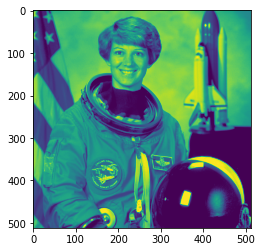

In [10]:
plt.imshow(im)

In [11]:
im.min(), im.max()

(0.0, 255.0)

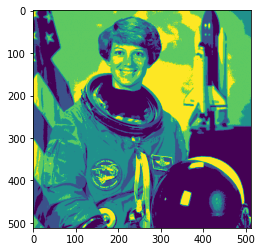

In [12]:
im[np.where(im<50)] = 0
im[np.where((50<=im) & (im<100))] = 1
im[np.where((100<=im) & (im<150))] = 2
im[np.where((150<=im) & (im<200))] = 3
im[np.where(200<=im)] = 4
plt.imshow(im)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
flat_im = np.reshape(im, (-1, 1))
im_encoder = OneHotEncoder(sparse=False)
onehot_im = im_encoder.fit_transform(flat_im)

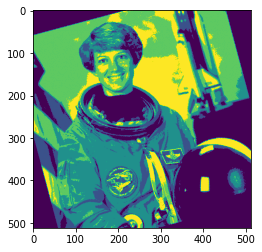

In [ ]:
## rotate one hot im
onehot_im = onehot_im.reshape(512, 512, -1)
onehot_im_rot = np.empty_like(onehot_im)
n_cat = onehot_im.shape[-1]
for c in range(n_cat):
  onehot_im_rot[..., c] = skimage.transform.rotate(onehot_im[..., c], 15)
im_rot_flat = im_encoder.inverse_transform(np.reshape(onehot_im_rot, (-1, n_cat)))
im_rot = np.reshape(im_rot_flat, (512, 512))
plt.imshow(im_rot)